Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import sqlite3

In [4]:
#importing csv files from previous notebooks

citybike_df = pd.read_csv('C:/Taslim/LHL/Python Project/citybike.csv')
#citybike_df.head()

foursquare_df = pd.read_csv('C:/Taslim/LHL/Python Project/foursquare.csv')
#foursquare_df.head()


yelp_df = pd.read_csv('C:/Taslim/LHL/Python Project//yelp.csv')
#yelp_df.head()


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [5]:
# Triming lat-long to increase join match
citybike_df['latitude'] = citybike_df['latitude'].round(2)
citybike_df['longitude'] = citybike_df['longitude'].round(2)

foursquare_df['latitude'] = foursquare_df['latitude'].round(2)
foursquare_df['longitude'] = foursquare_df['longitude'].round(2)

yelp_df['latitude'] = yelp_df['latitude'].round(2)
yelp_df['longitude'] = yelp_df['longitude'].round(2)


# Merting multiple dataframe
merged_df = pd.merge(citybike_df, foursquare_df, on=['latitude', 'longitude'])
merged_df2 = pd.merge(merged_df, yelp_df, on=['latitude', 'longitude'])
#merged_df3 = pd.merge(merged_df2, merged_df2, on=['latitude', 'longitude'])
merged_df2.head()


,Unnamed: 0_x,name_x,latitude,longitude,bikes_available,Unnamed: 0_y,fsq_id,category_id,category_name,chains,...,location_postcode,location_region,location_timezone,name_y,Unnamed: 0,name,rating,review_count,price,distance_y
0,0,Queen St E / Woodward Ave,43.67,-79.32,13,0,4b65b9f1f964a520fefb2ae3,13031,Burger Joint,[{'id': 'ab4a3530-d68a-012e-5619-003048cad9da'...,...,M9N 2J3,ON,America/Toronto,McDonald's,0,Descendant Detroit Style Pizza,4.5,418,$$,1048.126922
1,0,Queen St E / Woodward Ave,43.67,-79.32,13,0,4b65b9f1f964a520fefb2ae3,13031,Burger Joint,[{'id': 'ab4a3530-d68a-012e-5619-003048cad9da'...,...,M9N 2J3,ON,America/Toronto,McDonald's,1,Maha's,4.0,572,$$,1005.190035
2,0,Queen St E / Woodward Ave,43.67,-79.32,13,0,4b65b9f1f964a520fefb2ae3,13031,Burger Joint,[{'id': 'ab4a3530-d68a-012e-5619-003048cad9da'...,...,M9N 2J3,ON,America/Toronto,McDonald's,2,The Burger's Priest,3.5,503,$$,374.238073
3,0,Queen St E / Woodward Ave,43.67,-79.32,13,0,4b65b9f1f964a520fefb2ae3,13031,Burger Joint,[{'id': 'ab4a3530-d68a-012e-5619-003048cad9da'...,...,M9N 2J3,ON,America/Toronto,McDonald's,3,Completo,4.5,169,$,1184.032903
4,0,Queen St E / Woodward Ave,43.67,-79.32,13,0,4b65b9f1f964a520fefb2ae3,13031,Burger Joint,[{'id': 'ab4a3530-d68a-012e-5619-003048cad9da'...,...,M9N 2J3,ON,America/Toronto,McDonald's,4,Ed's Real Scoop,4.5,209,$$,1854.179445


       Unnamed: 0_x      latitude     longitude  bikes_available  \
count  30680.000000  30680.000000  30680.000000     30680.000000   
mean     255.373533     43.660887    -79.379361         7.641460   
std      194.557589      0.006020      0.020000         5.652266   
min        0.000000     43.650000    -79.450000         0.000000   
25%       69.000000     43.660000    -79.380000         3.000000   
50%      220.000000     43.660000    -79.380000         6.000000   
75%      443.000000     43.660000    -79.380000        12.000000   
max      608.000000     43.680000    -79.320000        28.000000   

       Unnamed: 0_y   category_id    distance_x    Unnamed: 0        rating  \
count  30680.000000  30680.000000  30680.000000  30680.000000  30680.000000   
mean      45.715776  13960.267275     57.645372    105.327901      4.197327   
std       16.854781   2296.067117     54.645631     38.852339      0.300395   
min        0.000000  10004.000000      1.000000      0.000000      3.50

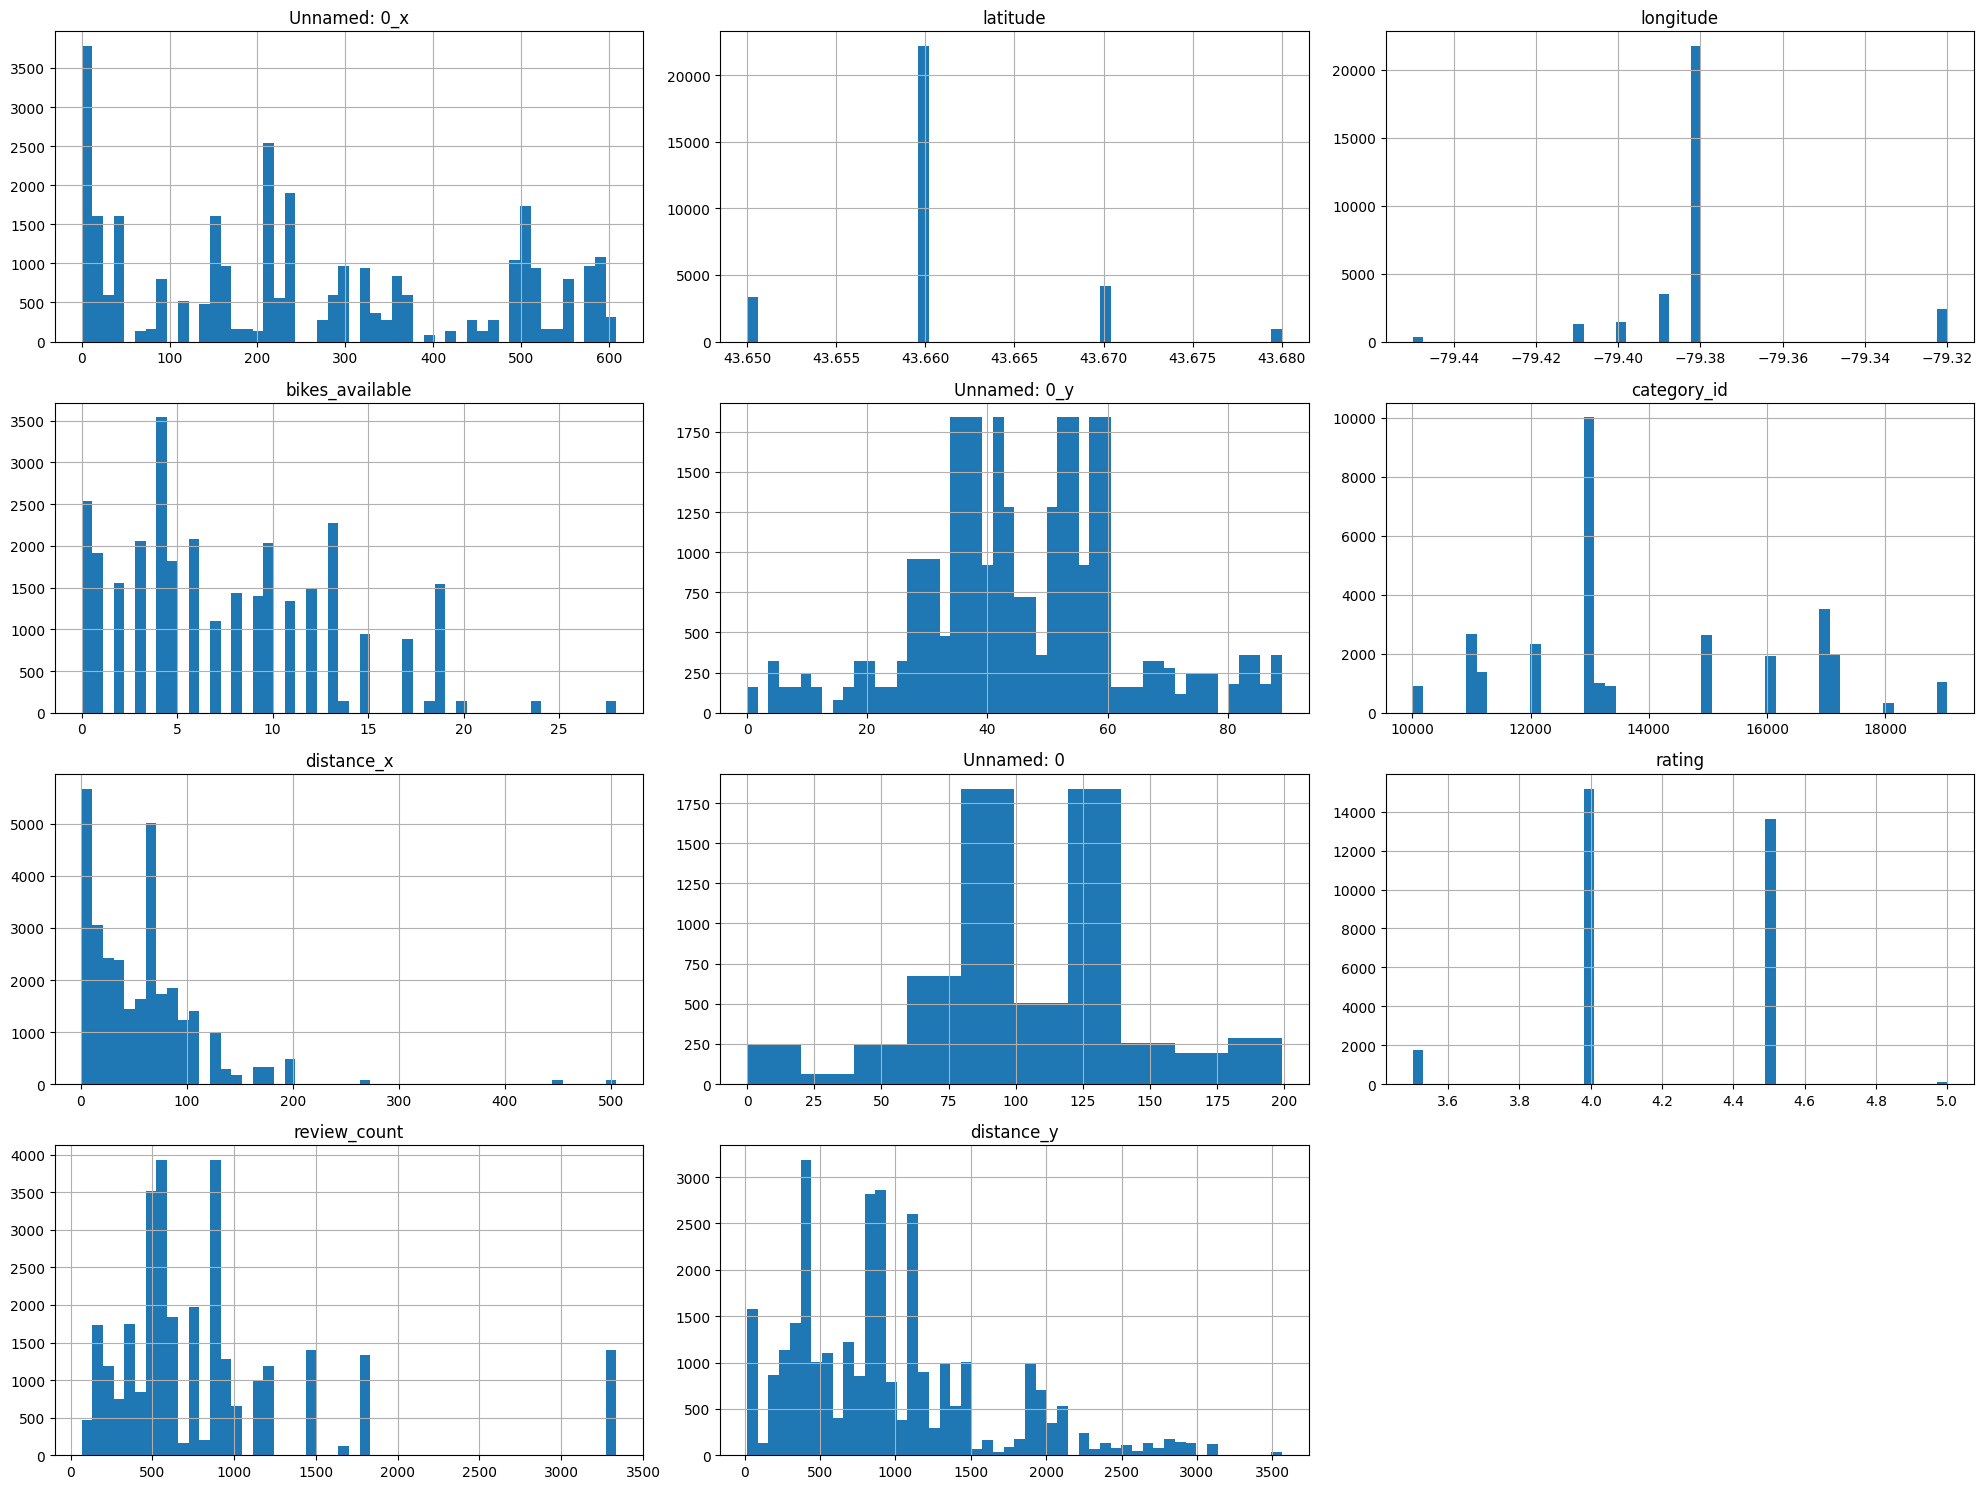

In [7]:
# Get the summary statistics of the data
print(merged_df2.describe())

# Plot histograms to visualize the distribution of each numerical column
merged_df2.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [8]:
# Connect to an SQLite database
conn = sqlite3.connect("database.sqlite")

# Store the Pandas dataframe into the SQLite database
merged_df2.to_sql("merged_data", conn, if_exists="replace")

# Close the connection to the SQLite database
conn.close()

Look at the data before and after the join to validate your data.